# K-Nearest Neighbours Movie Recommendation System


### Name: Francis Hall
### Student Number: C00220910

# Introduction

“The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modelling, data visualization, machine learning, and much more.” [1]

The purpose of this project is to provide a short technical data science revision tutorial focused on a particular machine learning algorithm, in this case, the K-Nearest Neighbours algorithm.
This tutorial will explain how the K-Nearest Neighbours alforithm works, and provide a practical example of the algorithm in use.

The goal is that by the end of this tutorial, a base knowledge of the K-Nearest Neighbours algorithm will be gained, as well as experience implementing the algorithm in a practical setting.
The tutorial also aims to provide a guide and general tips to aid in using some of the popular technologies and tools available for use in data science, including Jupyter Notebook, Pandas, NumPy and Matplotlib.

## Required Resources

There are a few resources that will be necessary for the tutorial and as such, should be downloaded/installed before beginning the tutorial.

#### Jupyter Notebook
We will use Jupyter Notebook for this tutorial as it allows for code segments to be written inside cells, which may compile and run independently of each other. This is useful for a project such as this, as the project as a whole may be segmented into cells, making the project more easily readable and digestible.

https://jupyter.org/

#### Pandas
Pandas is a free, open-source, data manipulation tool common for projects such as this, which allows us to import a dataset and clean, manipulate and explore it.

https://pandas.pydata.org/

#### Scikit-Learn
Scikit-Learn is a data analysis tool which allows for the pre-processing of data as well as hosting a number of commonly used machine learning algorithms which may be used as functions on an imported dataset.

https://scikit-learn.org/stable/

#### The Dataset
The practical example used in this tutorial will involve a movie recommendation system, and for this, we will need one dataset containing film titles and another containing user ratings related to the films in the former dataset.
MovieLens provides a dataset which will be perfect for this purpose. This dataset is available in small or full size, and either one should work for this purpose.

https://grouplens.org/datasets/movielens/latest/


# Main Body of Tutorial

## Problem Outline

Recommendation systems exist on almost all streaming services and many e-commerce websites, and the purpose of these systems is to allow the websites to feature content that is relevant and tailored to your tastes.
A popular example of this includes Netflix, which will actively recommend movies or TV shows to users based on their streaming history. Similarly, Amazon will recommend products based on previous orders.
Recommendation systems have proven to be very effective and provide benefits to both service providers and users alike.
Suppose we wanted to create a recommendation system that could recommend a list of movies that are a close match to one chosen movie.
This can be achieved using all of the tools mentioned above as well as a classification algorithm known as K-Nearest Neighbours.


## K-Nearest Neighbours

K-Nearest Neighbours is a classification algorithm used in machine learning. It is a method for classifying objects based on the closest training examples.

In K-Nearest Neighbours algorithm, data is divided into a test set and a training set.
For each row in the test set, the k nearest objects are found based on a given distance metric.


Here is a useful video explanation of K-Nearest Neighbours from StatQuest

In [1]:
from IPython.display import HTML


HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/HVXime0nQeI" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## Jupyter Project Setup

### Useful Features and Shortcuts

Below are some useful keyboard shortcuts for managing a project in jupyter notebooks that may make the experience quicker and easier [2]:

Delete Current Cell: D (twice)

Undo Cell Deletion: Z

Run current Cell: CTRL+Enter

Run Current Cell and move to next cell: Shift+Enter

Run Current Cell and Insert Cell Below: Alt+Enter

Insert a new cell above the current cell: A

Insert a new cell below the current cell: B

Change Cell Type to Markdown: M

Change Cell Type to Code: Y





### Importing the Libraries

First thing to do here is to import the relevant libraries, in this case, Pandas, Matplotlib and NumPy.
We will name these instances here and use these names later to call the imported libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the Dataset

Now we will import the dataset, or in this case, two datasets that we need. The datasets being imported should be in the same folder as your Jupyter Notebook file.

In [3]:
movies = pd.read_csv('movies.csv')

In [4]:
ratings = pd.read_csv('ratings.csv')

### Exploring the Dataset

Now that we have the datasets imported, we may use some builtin functions from Pandas to explore the dataset a little.

#### .head() function
The .head() function will return the top functions of a dataset.
Using this function, we get an example of how the data is structured.
By default, and without taking in any argument, this function will return the top 5 rows of the dataset.


In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


By passing an integer as an argument into the .head function, we may view that number of rows.
ie. dataframe.head(x) will return the top x rows.

In [6]:
ratings.head(12)

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264
5,1,1590,2.5,1256677236
6,1,1591,1.5,1256677475
7,1,2134,4.5,1256677464
8,1,2478,4.0,1256677239
9,1,2840,3.0,1256677500


#### shape function
The shape function will return the number of rows and columns in a dataset in the form (rows, columns)

In [7]:
movies.shape

(58098, 3)

In [8]:
ratings.shape

(27753444, 4)

#### drop function
At this point, it may be clear that not all columns in a dataset will be useful, and it may be desirable to remove those columns which won't be used. This can be achieved with the drop function.
Here, we will drop the genres column from movies and the timestamp column from ratings, as we won't need to use them for this project.

In [9]:
movies = movies.drop(['genres'], axis=1)

In [10]:
ratings = ratings.drop(['timestamp'], axis=1)

In [11]:
movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [12]:
ratings.head()

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5


### Merging datasets
Now that we have our datasets reduced to only include their useful columns. We may merge them to create one dataset which will be used as the primary dataset going forward.
Specifically, we may merge the datasets on a particular column. Both the movies and ratings datasets share the column movieId, and as such may be merged on this column using the merge function.

In [13]:
df = pd.merge(movies, ratings, on='movieId')
df.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),4,4.0
1,1,Toy Story (1995),10,5.0
2,1,Toy Story (1995),14,4.5
3,1,Toy Story (1995),15,4.0
4,1,Toy Story (1995),22,4.0


### Visualising Data

We may use the Matplotlib library to create visualisations based on the dataset in the form of charts and plots.
For example, here, we can create a visualisation to show the movies with the highest number of ratings.

In [14]:
mostRatedMoviesPlot = df.title.value_counts().sort_values().tail(10)

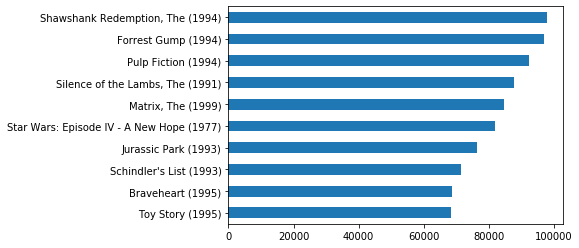

In [15]:
mostRatedMoviesPlot.plot.barh()

And similarly, we may create a visualisation showing the least rated movies

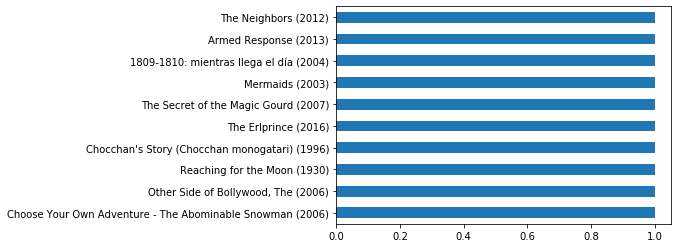

In [16]:
leastRatedMoviesPlot = df.title.value_counts().sort_values().head(10)
leastRatedMoviesPlot.plot.barh()

## Building the Model

To begin, the dataset must be edited to fit the model. For this, we will need to add a count to each movie which represents the total number of ratings present in the dataset, and then add a column to the main dataset which represents this count.

In [17]:
df['count'] = df.groupby('title')['rating'].transform('count')

df.head()


,movieId,title,userId,rating,count
0,1,Toy Story (1995),4,4.0,68469
1,1,Toy Story (1995),10,5.0,68469
2,1,Toy Story (1995),14,4.5,68469
3,1,Toy Story (1995),15,4.0,68469
4,1,Toy Story (1995),22,4.0,68469


In [18]:
df.shape

(27753444, 5)

Now, given that the dataset has millions of rows, this is likely to cause problems later. In the interest of mitigating any errors later, we're going to limit the movies present in the dataset.

Here, our dataset will store only movie data that has a count of 5000 or more. In other words, only movies which have more than 5000 ratings will be present in the dataset.
This should cut the amount of rows considerably, and to the point where we can work with it.

As you can see below, this has cut the number of entries in the dataset from over 27 million down to just over 19 million.

NOTE: 5000 was the limit chosen based on some experimentation. Obviously, this will limit the movies present in the dataset, so it may be prudent to experiment with the cell below and discern an appropriate minimum count for yourself.

In [19]:
df = df.query('count >= 5000')
df.shape

(19078140, 5)

Now with the dataset cut down to a workable size, we can create a pivot table based on the movie title, the userId, and the rating which each user gave each movie which they have rated.

In [20]:
final_df = df.pivot_table(index='title',columns='userId',values='rating').fillna(0)
final_df.head()


userId,1,2,3,4,5,6,7,8,9,10,...,283219,283220,283221,283222,283223,283224,283225,283226,283227,283228
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0


The final dataframe has been created, which is now a pivot table holding 1344 movies and their ratings from 281662 users

In [21]:
final_df.shape

(1344, 281662)

### SciKit-Learn


Scikit-Learn is a free machine learning library intended for use with Python. It includes functions for carrying out a number of machine learning algorithms on data, and as such, may be used here for K-Nearest Neighbours.

Here, we will set up a sparse matrix from the final database and fit the K-Nearest Neighbours model based on this matrix.

Below, we will call the NearestNeighbors function from sklearn without any arguments, which will cause the function to execute with its default parameters.
The model may be tweaked as these parameters are set and changed beyond the default values, and an explanation of parameters and valid values can be found here:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

In [22]:
#[3]
from scipy.sparse import csr_matrix

matrix = csr_matrix(final_df.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors()
model_knn.fit(matrix)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

Now we can use this model to find recommendations for a specific movie.

The below function will take a string, which should be the title of the movie we wish to see recommendations for.
The movie title will then be searched for in the dataset, and once found, a list will be created and printed, with the aid of our model, with a top 10 recommended movies based on our chosen movie. 

The list is printed in order of the 10 closest movies to our target movie as calculated by our model.

In [23]:
def chooseMovie(movieString):
    #Initialise index to 0
    i = 0
    
    #Iterate through dataset Until a movie is found which contains movieString
    for movie in final_df.index.values:
        if movieString in movie:
            chosenMovie = movie
            movieIndex = i
            break
            
        else: 
            i = i + 1
            
    #[4]        
    distances, indices = model_knn.kneighbors(final_df.iloc[movieIndex,:].values.reshape(1, -1), n_neighbors = 11)
    
    print("Chosen Movie:\n" + movie + "\n")

    for i in range(1, len(distances.flatten())):
            print(str(i) + ": " + final_df.index[indices.flatten()[i]])
            

## Exploring the Results

Now with the model created and ready for use with our chooseMovie function, we can begin to explore the results.
In this case, we will call the chooseMovie function on a variety of popular movies from different genres and see the kinds of recommendations we get from our model.

In [24]:
chooseMovie("Monty Python and the Holy Grail")

Chosen Movie:
Monty Python and the Holy Grail (1975)

1: Monty Python's Life of Brian (1979)
2: Monty Python's The Meaning of Life (1983)
3: Fish Called Wanda, A (1988)
4: This Is Spinal Tap (1984)
5: Young Frankenstein (1974)
6: Blues Brothers, The (1980)
7: Airplane! (1980)
8: Raising Arizona (1987)
9: Ghostbusters (a.k.a. Ghost Busters) (1984)
10: Ferris Bueller's Day Off (1986)


In [25]:
chooseMovie("Empire Strikes")

Chosen Movie:
Star Wars: Episode V - The Empire Strikes Back (1980)

1: Star Wars: Episode VI - Return of the Jedi (1983)
2: Star Wars: Episode IV - A New Hope (1977)
3: Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
4: Indiana Jones and the Last Crusade (1989)
5: Terminator, The (1984)
6: Aliens (1986)
7: Star Wars: Episode I - The Phantom Menace (1999)
8: Alien (1979)
9: Back to the Future (1985)
10: Die Hard (1988)


In [26]:
chooseMovie("Godfather, The")

Chosen Movie:
Godfather, The (1972)

1: Godfather: Part II, The (1974)
2: Goodfellas (1990)
3: Apocalypse Now (1979)
4: One Flew Over the Cuckoo's Nest (1975)
5: Reservoir Dogs (1992)
6: Full Metal Jacket (1987)
7: Jaws (1975)
8: Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)
9: Taxi Driver (1976)
10: Scarface (1983)


In [27]:
chooseMovie("Clockwork Orange, A")

Chosen Movie:
Clockwork Orange, A (1971)

1: Brazil (1985)
2: 2001: A Space Odyssey (1968)
3: Full Metal Jacket (1987)
4: Shining, The (1980)
5: Pi (1998)
6: Mulholland Drive (2001)
7: Blue Velvet (1986)
8: Fear and Loathing in Las Vegas (1998)
9: Apocalypse Now (1979)
10: RoboCop (1987)


In [28]:
chooseMovie("Rocky Horror Picture Show")

Chosen Movie:
Rocky Horror Picture Show, The (1975)

1: Honey, I Blew Up the Kid (1992)
2: Buffy the Vampire Slayer (1992)
3: Logan's Run (1976)
4: Superman III (1983)
5: I Still Know What You Did Last Summer (1998)
6: Desperately Seeking Susan (1985)
7: Little Shop of Horrors (1986)
8: Gremlins 2: The New Batch (1990)
9: RoboCop 2 (1990)
10: Speed 2: Cruise Control (1997)


In [29]:
chooseMovie("Frozen")

Chosen Movie:
Frozen (2013)

1: Brave (2012)
2: Wreck-It Ralph (2012)
3: Tangled (2010)
4: Megamind (2010)
5: The Lego Movie (2014)
6: Jurassic World (2015)
7: Pirates of the Caribbean: On Stranger Tides (2011)
8: Twilight (2008)
9: Ted (2012)
10: The Hunger Games: Mockingjay - Part 1 (2014)


In [30]:
chooseMovie("Exorcist")

Chosen Movie:
Exorcist, The (1973)

1: Halloween (1978)
2: Omen, The (1976)
3: Poltergeist (1982)
4: Carrie (1976)
5: Evil Dead, The (1981)
6: Rosemary's Baby (1968)
7: Nightmare on Elm Street, A (1984)
8: Gremlins 2: The New Batch (1990)
9: Jaws 2 (1978)
10: Misery (1990)


In [31]:
chooseMovie("Kill Bill")

Chosen Movie:
Kill Bill: Vol. 1 (2003)

1: Kill Bill: Vol. 2 (2004)
2: Sin City (2005)
3: Matrix Reloaded, The (2003)
4: Matrix Revolutions, The (2003)
5: Shaun of the Dead (2004)
6: Spider-Man 2 (2004)
7: Star Wars: Episode III - Revenge of the Sith (2005)
8: V for Vendetta (2006)
9: Lost in Translation (2003)
10: 28 Days Later (2002)


In [32]:
chooseMovie("Donnie Darko")

Chosen Movie:
Donnie Darko (2001)

1: The Machinist (2004)
2: Requiem for a Dream (2000)
3: 28 Days Later (2002)
4: Shaun of the Dead (2004)
5: Children of Men (2006)
6: Sin City (2005)
7: Garden State (2004)
8: Pan's Labyrinth (Laberinto del fauno, El) (2006)
9: Mulholland Drive (2001)
10: Life Aquatic with Steve Zissou, The (2004)


# Conclusion

There are a couple of observations to be made from the examples above which may indicate the success of our recommendation system. 

Firstly, if we choose a movie that has a sequel or sequels, these sequels will often be recommended, as one might expect from a decent recommendation system. This can be observed in the case of Kill Bill, Star Wars, and The Godfather. (Interestingly, Godfather: Part III was not recommended for The Godfather.)

Secondly, when a movie is chosen which has a strong link to a specific genre, most or all of the recommended movies will also match this genre. This is particularly clear in the case of The Exorcist, where all recommended movies belong to the Horror genre, and in the case of Frozen, where 9 out of the 10 recommended movies could be considered Family movies. (Except for Ted, of course, which should definitely not be viewed by children, despite the title character being a cute talking teddy bear.)

### Potential Problems and Future Improvements

#### Movies Present
Due to the fact that we limited the dataset to movies which had 5000 or more ratings, there are a lot of movies that didn't make it into the final dataset. Ideally, we could find a way to get the system working without this limitation.

#### Popularity Bias
This system, like many other recommendation systems is also susceptible to popularity bias, wherin movies with a higher number of ratings are more likely to be recommended than movies with a lower number.

#### Age Rating
In some cases, for example wwhen a Family movie is chosen, it is possible that our system will recommend movies which are intended to be viewed by mature audiences only. This is because the dataset used does not contain data representing the age rating for a movie, and as such our system does not account for this.
The system could potentially work better and certainly safer if, for example, movies rated 15+ were excluded from recommendations for a movie rated U.

# References

[1]  https://jupyter.org/ 

https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

[2] https://towardsdatascience.com/jypyter-notebook-shortcuts-bf0101a98330

[3] https://www.kaggle.com/yesvenkat/knn-recommendation-system

[4] https://stackoverflow.com/questions/52644760/returning-a-list-of-nearest-neighbors-from-knn